In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

import graphviz
!pip install --yes python-graphviz
!pip install --yes graphviz

import matplotlib.pyplot as plt


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --yes

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --yes


In [2]:
data_1 = pd.read_csv('/content/drive/MyDrive/merge_all_3_sa.csv')

In [3]:
data_1.shape

(105508, 51)

In [4]:
data_1.head()

,id,created_by,created_date,last_modified_by,last_modified_date,emails_deactivated,manual_request,tracking_only,invoicing,surveyor,...,user_has_visited,supplier_has_visited,equipment_count,equipment_type,event,user_id,impersonated,created_date.1,company_id,request_id.1
0,21654,christina.andreasen@k-tainer.eu,05-06-2018 15:12,christina.andreasen@k-tainer.eu,27-07-2018 11:43,0,1,0,0,0,...,0,0,20,FORTY_DRY_CONTAINER,View Request Details,507,0,05-06-2018 16:16,115,21654
1,21556,mod@cfscon.com,05-06-2018 07:23,tony@tradecorp.hk,05-06-2018 16:19,0,1,0,0,0,...,0,0,2,FORTY_DRY_CONTAINER,View Request Details,343,1,05-06-2018 16:19,92,21556
2,21556,mod@cfscon.com,05-06-2018 07:23,tony@tradecorp.hk,05-06-2018 16:19,0,1,0,0,0,...,0,0,2,FORTY_DRY_CONTAINER,Reject Request,343,1,05-06-2018 16:19,92,21556
3,21556,mod@cfscon.com,05-06-2018 07:23,tony@tradecorp.hk,05-06-2018 16:19,0,1,0,0,0,...,0,0,2,FORTY_DRY_CONTAINER,View Request Details,343,1,05-06-2018 16:19,92,21556
4,21547,mod@cfscon.com,05-06-2018 07:13,tony@tradecorp.hk,05-06-2018 16:19,0,1,0,0,0,...,0,0,6,FORTY_DRY_CONTAINER,View Request Details,343,1,05-06-2018 16:19,92,21547


In [15]:
data_1['sentiment'].fillna("neutral", inplace = True)

In [4]:
data_1.columns

Index(['id', 'created_by', 'created_date', 'last_modified_by',
       'last_modified_date', 'emails_deactivated', 'manual_request',
       'tracking_only', 'invoicing', 'surveyor', 'auto_time_out_expires_soon',
       'source', 'decline_after_accept', 'assisted_transaction',
       'active_matchmaking', 'insurance_only', 'critical', 'leasing',
       'prepayment_of_charge', 'no_payment_guarantee', 'grey_zone_agreed',
       'has_damage_claim', 'requester_id', 'addressee_id', 'direction',
       'last_modified_date.1', 'request_id', 'version', 'editor_id', 'comment',
       'sentiment', 'status', 'request_reject_reason_id', 'pickup_charge',
       'pickup_charge_payer_id', 'damage_protection_plan', 'per_diem',
       'free_days', 'total_loss_insurance', 'damage_protection_insurance',
       'original_id', 'user_has_visited', 'supplier_has_visited',
       'equipment_count', 'equipment_type', 'event', 'user_id', 'impersonated',
       'created_date.1', 'company_id', 'request_id.1'],
    

In [41]:
data_1.nunique()

id                             16075
created_by                       357
created_date                    9302
last_modified_by                 367
last_modified_date              9733
emails_deactivated                 2
manual_request                     2
tracking_only                      2
invoicing                          2
surveyor                           2
auto_time_out_expires_soon         2
source                             2
decline_after_accept               2
assisted_transaction               2
active_matchmaking                 1
insurance_only                     2
critical                           2
leasing                            1
prepayment_of_charge               1
no_payment_guarantee               1
grey_zone_agreed                   1
has_damage_claim                   2
requester_id                     209
addressee_id                     276
direction                          2
last_modified_date.1           10068
request_id                     16075
v

In [33]:
drop_list = ['id','created_by', 'created_date', 'last_modified_by', 'last_modified_date','active_matchmaking', 'requester_id', 
             'addressee_id', 'last_modified_date.1', 'request_id', 'editor_id', 'comment', 'pickup_charge_payer_id', 'original_id',
             'damage_protection_insurance', 'user_id', 'created_date.1', 'company_id', 'request_id.1', 'source']

In [80]:
data_2 = data_1.drop(drop_list,axis =1)

In [81]:
data_2.shape

(105508, 31)

In [82]:
data_2.dtypes

emails_deactivated              int64
manual_request                  int64
tracking_only                   int64
invoicing                       int64
surveyor                        int64
auto_time_out_expires_soon      int64
decline_after_accept            int64
assisted_transaction            int64
insurance_only                  int64
critical                        int64
leasing                         int64
prepayment_of_charge            int64
no_payment_guarantee            int64
grey_zone_agreed                int64
has_damage_claim                int64
direction                      object
version                         int64
sentiment                      object
status                         object
request_reject_reason_id        int64
pickup_charge                   int64
damage_protection_plan        float64
per_diem                      float64
free_days                       int64
total_loss_insurance            int64
user_has_visited                int64
supplier_has

In [83]:
data_2.nunique()

emails_deactivated              2
manual_request                  2
tracking_only                   2
invoicing                       2
surveyor                        2
auto_time_out_expires_soon      2
decline_after_accept            2
assisted_transaction            2
insurance_only                  2
critical                        2
leasing                         1
prepayment_of_charge            1
no_payment_guarantee            1
grey_zone_agreed                1
has_damage_claim                2
direction                       2
version                        18
sentiment                       4
status                          4
request_reject_reason_id       34
pickup_charge                  64
damage_protection_plan         30
per_diem                       67
free_days                      50
total_loss_insurance            2
user_has_visited                2
supplier_has_visited            2
equipment_count               103
equipment_type                 28
event         

In [84]:
for col in ['emails_deactivated', 'manual_request', 'tracking_only', 'invoicing', 'surveyor', 'auto_time_out_expires_soon', 'decline_after_accept',
       'assisted_transaction', 'insurance_only', 'critical', 'leasing', 'prepayment_of_charge', 'no_payment_guarantee', 'grey_zone_agreed',
       'has_damage_claim', 'direction', 'version', 'sentiment', 'status', 'request_reject_reason_id', 'total_loss_insurance', 'user_has_visited',
       'supplier_has_visited', 'equipment_type', 'event','impersonated']:
    data_2[col] = data_2[col].astype('category')

In [85]:
data_2.dtypes

emails_deactivated            category
manual_request                category
tracking_only                 category
invoicing                     category
surveyor                      category
auto_time_out_expires_soon    category
decline_after_accept          category
assisted_transaction          category
insurance_only                category
critical                      category
leasing                       category
prepayment_of_charge          category
no_payment_guarantee          category
grey_zone_agreed              category
has_damage_claim              category
direction                     category
version                       category
sentiment                     category
status                        category
request_reject_reason_id      category
pickup_charge                    int64
damage_protection_plan         float64
per_diem                       float64
free_days                        int64
total_loss_insurance          category
user_has_visited         

In [86]:
data_2['status'].unique()

['CANCELLED', 'EMPTY_RETURNED', 'READY_FOR_PICKUP', 'PICKED_UP']
Categories (4, object): ['CANCELLED', 'EMPTY_RETURNED', 'PICKED_UP', 'READY_FOR_PICKUP']

Creating Target Variable

In [87]:
for i in range(len(data_2)):
    if(data_2.loc[i, 'status'] == 'CANCELLED'):
        data_2.loc[i, 'target_status'] = 0
    else:
      data_2.loc[i, 'target_status'] = 1       

In [89]:
data_2.drop('status', axis = 1, inplace = True)

In [91]:
data_2['target_status'] = data_2['target_status'].astype('category')

In [92]:
pd.value_counts(data_2['target_status'].values)

0.0    74314
1.0    31194
dtype: int64

Normalization

In [95]:
norm_list = ['pickup_charge','damage_protection_plan', 'per_diem', 'free_days', 'equipment_count']

In [97]:
min_max_scaler = MinMaxScaler()
data_2[['pickup_charge','damage_protection_plan', 'per_diem', 'free_days', 'equipment_count']]  = min_max_scaler.fit_transform(data_2[['pickup_charge','damage_protection_plan', 'per_diem', 'free_days', 'equipment_count']])

In [142]:
data_2.describe()

,pickup_charge,damage_protection_plan,per_diem,free_days,equipment_count
count,105508.000000,105508.000000,105508.000000,105508.000000,105508.000000
mean,0.001622,0.009606,0.019843,0.010405,0.000910
std,0.012904,0.007807,0.009424,0.009387,0.003459
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.010099,0.015873,0.006557,0.000199
50%,0.000000,0.010099,0.015873,0.009836,0.000448
75%,0.002000,0.010099,0.023810,0.013115,0.000945
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
data_2.head()

,emails_deactivated,manual_request,tracking_only,invoicing,surveyor,auto_time_out_expires_soon,decline_after_accept,assisted_transaction,insurance_only,critical,...,per_diem,free_days,total_loss_insurance,user_has_visited,supplier_has_visited,equipment_count,equipment_type,event,impersonated,target_status
0,0,1,0,0,0,0,0,0,0,0,...,0.027778,0.006557,0,0,0,0.000945,FORTY_DRY_CONTAINER,View Request Details,0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.023810,0.013115,0,0,0,0.000050,FORTY_DRY_CONTAINER,View Request Details,1,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.023810,0.013115,0,0,0,0.000050,FORTY_DRY_CONTAINER,Reject Request,1,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.023810,0.013115,0,0,0,0.000050,FORTY_DRY_CONTAINER,View Request Details,1,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.023810,0.013115,0,0,0,0.000249,FORTY_DRY_CONTAINER,View Request Details,1,0.0


In [144]:
data_2.columns

Index(['emails_deactivated', 'manual_request', 'tracking_only', 'invoicing',
       'surveyor', 'auto_time_out_expires_soon', 'decline_after_accept',
       'assisted_transaction', 'insurance_only', 'critical', 'leasing',
       'prepayment_of_charge', 'no_payment_guarantee', 'grey_zone_agreed',
       'has_damage_claim', 'direction', 'version', 'sentiment',
       'request_reject_reason_id', 'pickup_charge', 'damage_protection_plan',
       'per_diem', 'free_days', 'total_loss_insurance', 'user_has_visited',
       'supplier_has_visited', 'equipment_count', 'equipment_type', 'event',
       'impersonated', 'target_status'],
      dtype='object')

In [145]:
categorical_Attributes = ['emails_deactivated', 'manual_request', 'tracking_only', 'invoicing', 'surveyor', 'auto_time_out_expires_soon', 'decline_after_accept',
       'assisted_transaction', 'insurance_only', 'critical', 'leasing', 'prepayment_of_charge', 'no_payment_guarantee', 'grey_zone_agreed',
       'has_damage_claim', 'direction', 'version', 'sentiment', 'request_reject_reason_id', 'total_loss_insurance', 'user_has_visited',
       'supplier_has_visited', 'equipment_type', 'event','impersonated']

In [239]:
data_3 = pd.get_dummies(columns=categorical_Attributes, data=data_2, 
                      prefix=categorical_Attributes, prefix_sep="_", drop_first=True)

In [233]:
X, y = data_3.loc[:,data_3.columns!='target_status'].values, data_3.loc[:,'target_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [242]:
X_train,X_test,y_train,y_test = train_test_split(data_3.drop(['target_status'],axis=1), data_3['target_status'],test_size = 0.30,random_state=1)

print("X TRAIN DATA SHAPE IS : ", X_train.shape)
print("X TEST DATA SHAPE IS :",X_test.shape)
print("y TRAIN DATA SHAPE IS : ", y_train.shape)
print("y TEST DATA SHAPE IS :",y_test.shape)

X TRAIN DATA SHAPE IS :  (73855, 104)
X TEST DATA SHAPE IS : (31653, 104)
y TRAIN DATA SHAPE IS :  (73855,)
y TEST DATA SHAPE IS : (31653,)


In [241]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0.0    63205
1.0    26476
Name: target_status, dtype: int64
0.0    11109
1.0     4718
Name: target_status, dtype: int64


In [243]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [244]:
clf.feature_importances_

array([3.34612539e-02, 1.09491686e-02, 2.56499544e-02, 2.70326880e-02,
       3.08270453e-02, 7.36128842e-03, 1.18763765e-02, 3.74235726e-02,
       3.42043518e-01, 8.38926240e-03, 0.00000000e+00, 2.83908952e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.90864836e-03, 4.05378301e-03, 4.26458449e-03, 5.68218686e-03,
       1.00280612e-02, 1.01666417e-02, 4.50070755e-03, 1.04647805e-02,
       4.37556818e-03, 2.58425492e-03, 1.04053608e-02, 3.60872201e-03,
       2.24051033e-02, 6.51670675e-05, 2.08233955e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.53610516e-03,
       6.61276249e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.49267636e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.93951324e-04, 0.00000000e+00, 3.48030417e-03, 1.51155869e-03,
       2.09403989e-02, 1.02178921e-03, 6.01915360e-03, 0.00000000e+00,
      

In [245]:
features = data_3.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plot_1 = pd.DataFrame([data_3.columns[indices],np.sort(importances)[::-1]])
pd.DataFrame([data_3.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,tracking_only_1,user_has_visited_1,total_loss_insurance_1,request_reject_reason_id_43,manual_request_1,pickup_charge,equipment_count,auto_time_out_expires_soon_1,free_days,per_diem,...,request_reject_reason_id_12,request_reject_reason_id_10,request_reject_reason_id_9,sentiment_positive,equipment_type_FORTY_FIVE_HIGH_CUBE_FLATRACK,version_19,version_18,version_17,equipment_type_FORTY_FIVE_HIGH_CUBE_PALLET_WIDE,event_View Request Details
1,0.342044,0.142095,0.070174,0.042925,0.037424,0.033461,0.030827,0.028391,0.027033,0.02565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
plot_1.to_csv('plot_w_tracking.csv')

In [246]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [247]:
print(train_pred[:5])
print(test_pred[:5])

[0. 1. 0. 0. 0.]
[0. 0. 0. 1. 1.]


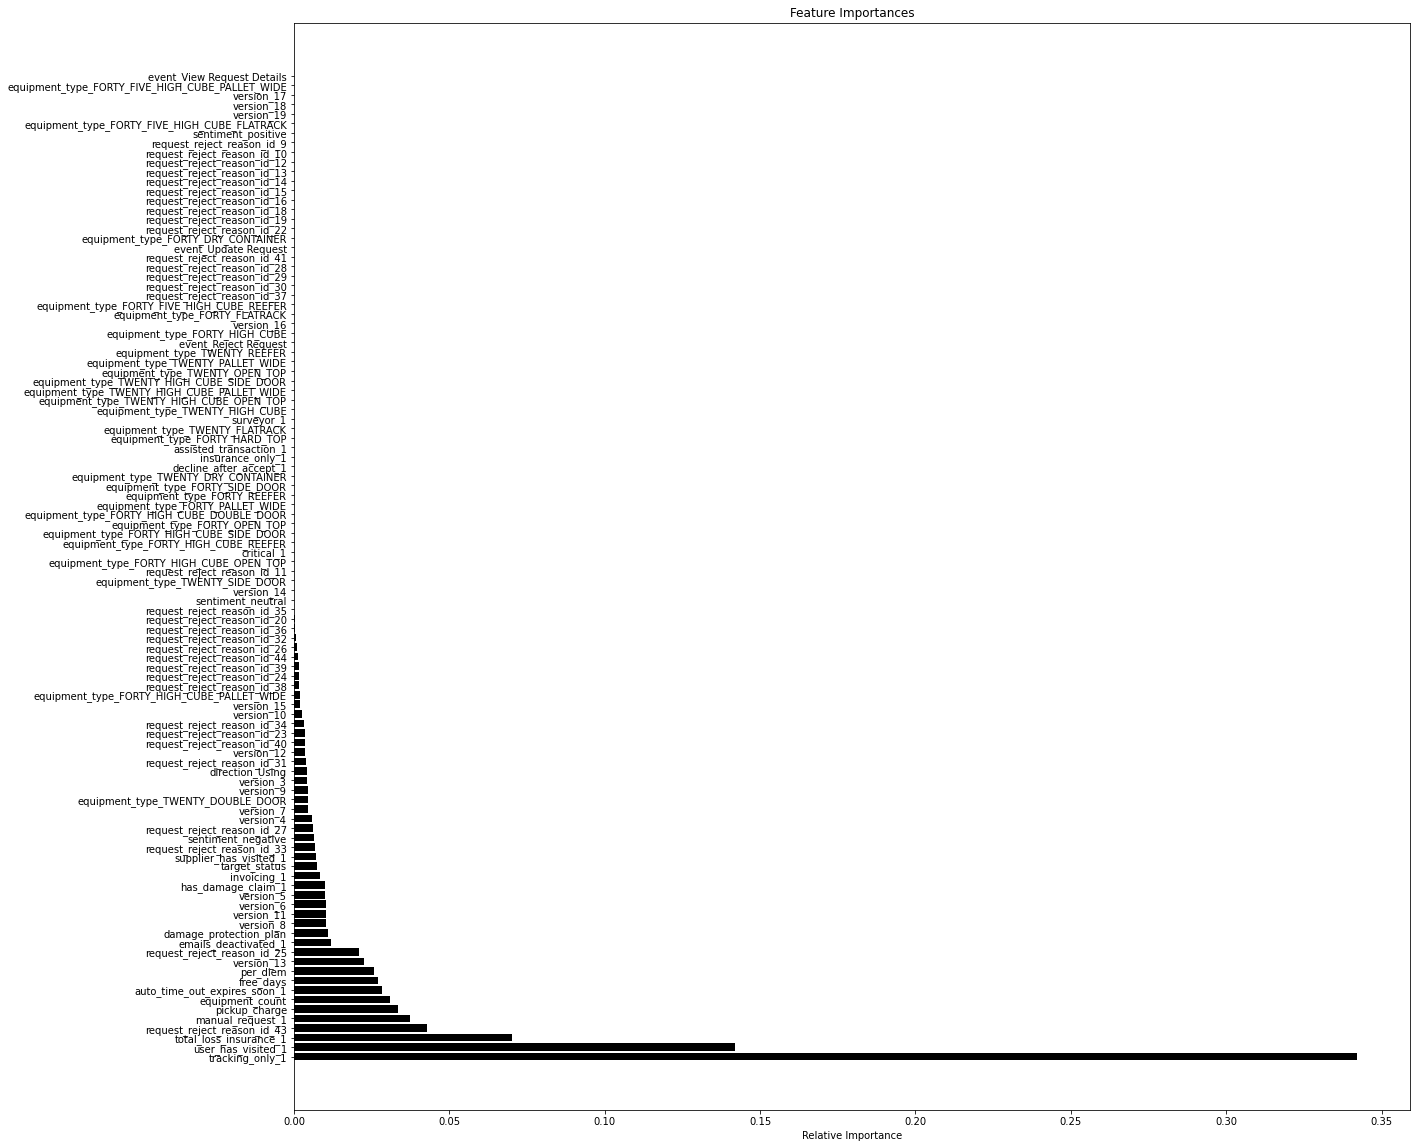

In [248]:
plt.rcParams["figure.figsize"] = (20,20)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [249]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[52105     0]
 [    0 21750]]
[[22202     7]
 [    2  9442]]


In [250]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [251]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9996848124634158
Test TPR:  0.9997882253282507
Test Accuracy:  0.9997156667614444


In [155]:
data_4 = data_3.drop('tracking_only_1', axis = 1)

In [158]:
X, y = data_4.loc[:,data_4.columns!='target_status'].values, data_4.loc[:,'target_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [159]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0.0    51949
1.0    21906
dtype: int64
0.0    22365
1.0     9288
dtype: int64


In [160]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [161]:
clf.feature_importances_

array([2.49124800e-02, 1.23449691e-02, 4.99886317e-02, 2.81896225e-02,
       3.97129106e-02, 1.08855200e-02, 1.31683013e-02, 3.39626660e-01,
       8.60896851e-03, 0.00000000e+00, 4.35916557e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.14757733e-03,
       3.90677903e-03, 4.64416900e-03, 6.69132785e-03, 1.01949169e-02,
       8.52629422e-03, 4.28176680e-03, 1.15429839e-02, 4.15376443e-03,
       2.80979969e-03, 9.95408165e-03, 3.91014842e-03, 2.14194049e-02,
       0.00000000e+00, 2.43165594e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.60344926e-03, 7.01351991e-03, 4.80675659e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29131136e-04,
       0.00000000e+00, 3.10973352e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.83510385e-04,
       0.00000000e+00, 3.98010765e-03, 1.17010815e-03, 1.77259377e-02,
       1.22086469e-03, 4.63907709e-03, 0.00000000e+00, 2.03441366e-03,
      

In [206]:
features = data_4.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plot_2 = pd.DataFrame([data_4.columns[indices],np.sort(importances)[::-1]])
pd.DataFrame([data_4.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,manual_request_1,user_has_visited_1,total_loss_insurance_1,per_diem,auto_time_out_expires_soon_1,equipment_count,request_reject_reason_id_43,free_days,pickup_charge,version_13,...,event_Update Request,request_reject_reason_id_22,request_reject_reason_id_19,equipment_type_TWENTY_DRY_CONTAINER,request_reject_reason_id_16,request_reject_reason_id_15,request_reject_reason_id_14,request_reject_reason_id_12,request_reject_reason_id_10,event_View Request Details
1,0.339627,0.140634,0.072355,0.049989,0.043592,0.039713,0.029969,0.02819,0.024912,0.021419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


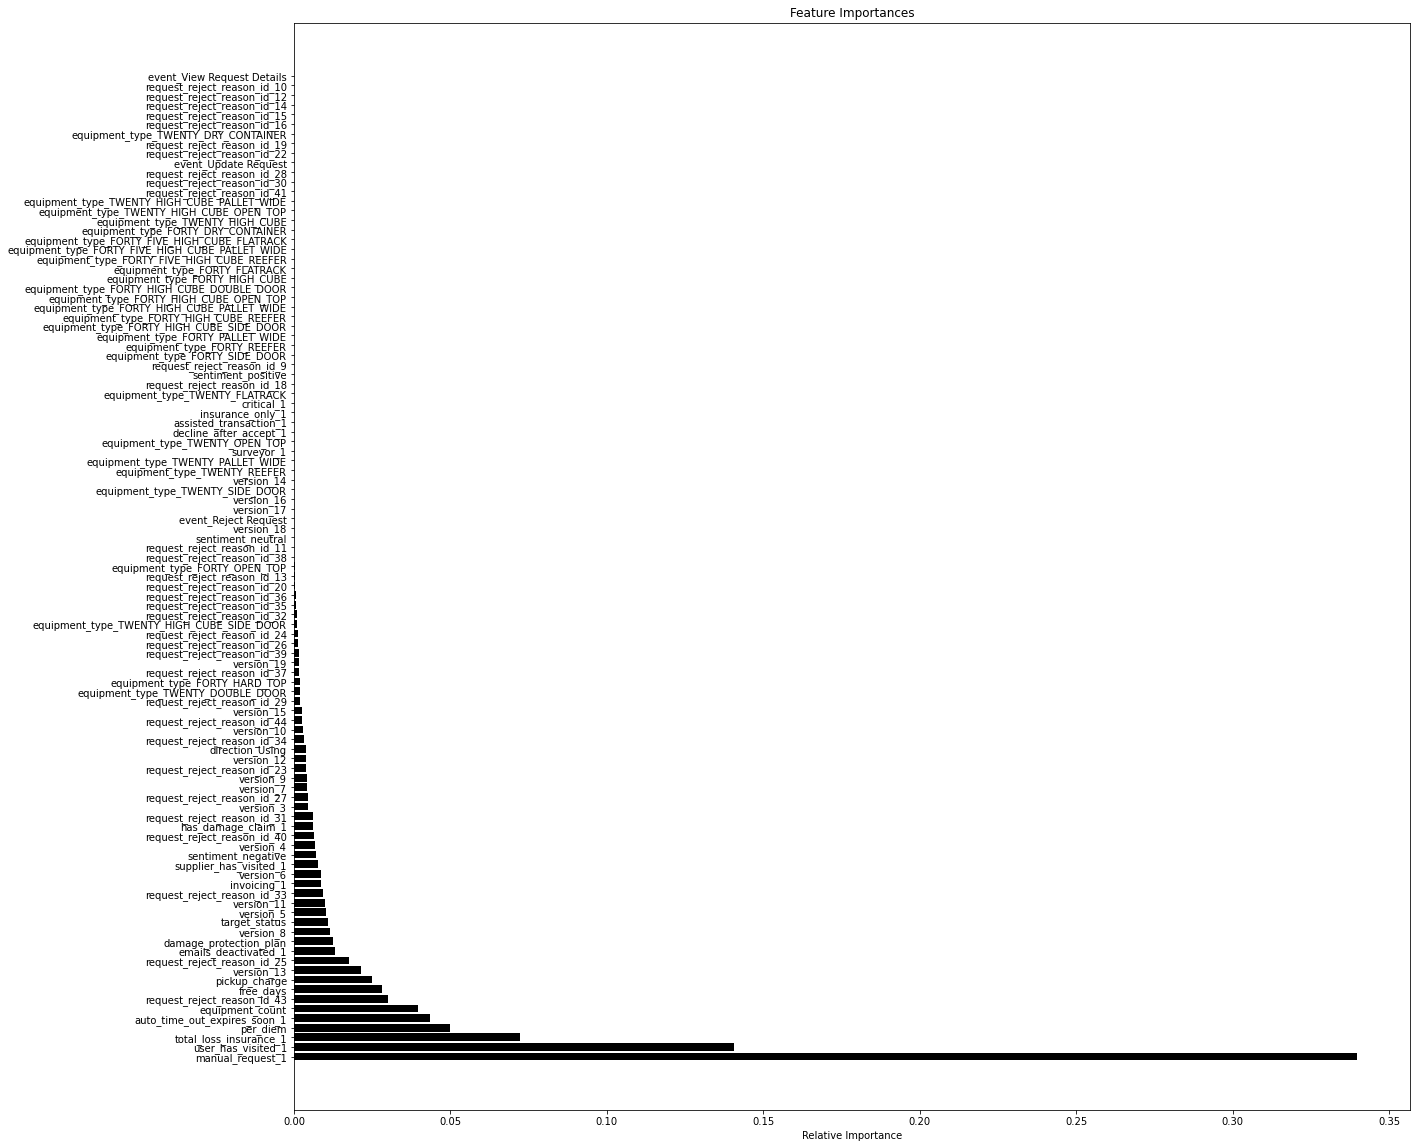

In [212]:
import plotly.express as px
plt.rcParams["figure.figsize"] = (20,20)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [202]:
plot_2 = plot_2.iloc[:,0:5]

In [214]:
plot_2.to_csv('plt_wo_tracking.csv')